In [1]:
from modelo_tweets import *

In [2]:
partidos=pd.read_csv('entradas/Partidos.csv')
manifestaciones=pd.read_csv('entradas/Manifestaciones.csv')
f_especiales=pd.read_csv('entradas/FechasEspeciales.csv')

partidos_M=pd.to_datetime(partidos['Fecha'].dropna())
partidos_S=pd.to_datetime(partidos['Fecha.1'].dropna())
manifestaciones=pd.to_datetime(manifestaciones['Fecha'].dropna())
f_especiales=pd.to_datetime(f_especiales[['2019','2020']].values.flatten())
f_especiales=f_especiales[~f_especiales.isna()]

def TC(t):
    return np.array([(pd.Timestamp(t.date()) == partidos_M).sum(),
                     (pd.Timestamp(t.date()) == partidos_S).sum(),
                     (pd.Timestamp(t.date()) == manifestaciones).sum(),
                     (pd.Timestamp(t.date()) == f_especiales).sum(),
                     t.weekday()/6.0,(t.hour > 12)*1,1
                    ])

In [3]:
with open('entradas/data_tweets.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [4]:
train_period=('2019-10-01 00:00','2019-12-01 00:00')
validate_period=('2019-12-01 00:00','2019-12-10 00:00')
model=modelTweets(data,
                  train_period,
                  validate_period,
                  f_covariates=(TC,restore_date),
                  followers_rate=6,
                  win_size_pred_period=1
                 )

In [ ]:
A,B=get_particion(model.train_start,model.train_end,model.f_covariates)

In [ ]:
np.array([model.f_covariates(b) for b in B]).sum(axis=0)

In [ ]:
len(B)

In [ ]:
model.compute_Beta()

In [ ]:
model.compute_p_est()

In [ ]:
model.infectious_rate_fit()

In [5]:
model.train()

/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:170: RuntimeWarning: divide by zero encountered in true_divide
  return count_events / kernel_int.sum()
/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:170: RuntimeWarning: invalid value encountered in true_divide
  return count_events / kernel_int.sum()
/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:256: RuntimeWarning: overflow encountered in exp
  return p0*(1-r0*np.sin(2*np.pi/tm*(t+phi0)))*np.exp(-(t-t0)/taum)
/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:336: RuntimeWarning: invalid value encountered in multiply
  sum_ext=np.nan_to_num(sum_int*p_t)


(array([ 0.31020164, -0.13215305, -2.0197377 , -0.59119503,  3.63525715,
        -0.64402529,  2.93843778]),
 array([0., 0., 1.]),
 nan,
 array([ 34.63353912,  35.03248267,  35.48081328, ..., 205.16315344,
        205.63290103,  95.4675873 ]))

In [6]:
A,B=model.compute_lambda_predict()

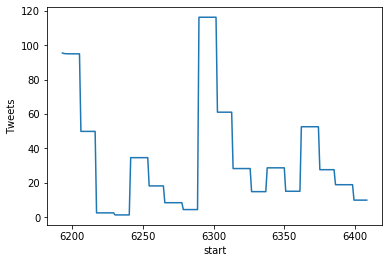

In [7]:
sns.lineplot(B.start,B.Tweets)

In [8]:
model.compute_errors()

/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:592: RuntimeWarning: divide by zero encountered in true_divide
  self.errors_predict['APE']=diff/real


({'APE': array([5.15358529e-01, 1.93047951e-01, 2.96733035e-02, 2.02075789e-02,
         4.98022071e-02, 7.75517061e-02, 2.33795779e-01, 2.51903459e-01,
         4.03245943e-02, 2.80244556e-01, 1.44075095e-01, 1.17736994e-01,
         1.17736907e-01, 3.43479516e-01, 2.16964786e-01, 7.81984145e-01,
         2.56396828e+00, 1.56318520e+01, 9.95822238e-01, 1.08790132e-01,
         2.55290210e-01, 5.94345074e-01, 5.73542257e-01, 4.80254626e-01,
         9.68278093e-01, 9.65194019e-01, 9.69438651e-01, 9.76133042e-01,
         9.76579153e-01, 9.67454148e-01, 9.68674617e-01, 9.67025913e-01,
         9.60843271e-01, 9.71522379e-01, 9.69806860e-01, 9.89935620e-01,
         9.88960217e-01, 9.90029526e-01, 9.79752268e-01, 9.67899937e-01,
         9.49380669e-01, 9.45162392e-01, 9.65365721e-01, 9.87583938e-01,
         9.92962018e-01, 9.91509016e-01, 9.90178339e-01, 9.88035431e-01,
         5.67300878e-01, 6.19605168e-01, 6.85309730e-01, 7.69227135e-01,
         7.62904591e-01, 7.57930561e-01, 8.7

inf

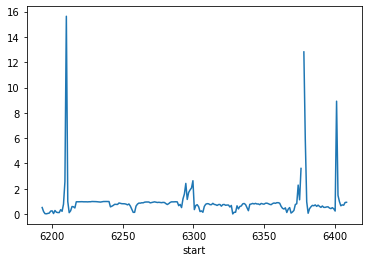

In [9]:
sns.lineplot(B.start,model.errors_predict['APE'])
model.errors_predict['APE'].mean()

In [ ]:
model.method_pred = 'thinning'

In [ ]:
C,D=model.compute_lambda_predict()

In [ ]:
sns.lineplot(D.start,D.Tweets)

In [ ]:
model.compute_errors()

In [ ]:
sns.lineplot(B.start,model.errors_predict_cum['APE'])
model.errors_predict_cum['APE'].mean()